In [7]:
import rasterio
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as colors

data_path = Path.home()/'OneDrive'/'Kirstin'/'Uni'/'Year4'/'MSciProject'/'data_files'

In [4]:
tif_file1 = rasterio.open(data_path/'population_files'/'GHS_POP_E2015_GLOBE_R2023A_4326_30ss_V1_0_R3_C17.tif')
tif_file2 = rasterio.open(data_path/'population_files'/'GHS_POP_E2015_GLOBE_R2023A_4326_30ss_V1_0_R3_C18.tif')
tif_file3 = rasterio.open(data_path/'population_files'/'GHS_POP_E2015_GLOBE_R2023A_4326_30ss_V1_0_R3_C19.tif')

tif_file4 = rasterio.open(data_path/'population_files'/'GHS_POP_E2015_GLOBE_R2023A_4326_30ss_V1_0_R4_C17.tif')
tif_file5 = rasterio.open(data_path/'population_files'/'GHS_POP_E2015_GLOBE_R2023A_4326_30ss_V1_0_R4_C18.tif')
tif_file6 = rasterio.open(data_path/'population_files'/'GHS_POP_E2015_GLOBE_R2023A_4326_30ss_V1_0_R4_C19.tif')

tif_file8 = rasterio.open(data_path/'population_files'/'GHS_POP_E2015_GLOBE_R2023A_4326_30ss_V1_0_R5_C18.tif')
tif_file9 = rasterio.open(data_path/'population_files'/'GHS_POP_E2015_GLOBE_R2023A_4326_30ss_V1_0_R5_C19.tif')

ghs_data1 = tif_file1.read()
ghs_data2 = tif_file2.read()
ghs_data3 = tif_file3.read()
ghs_data4 = tif_file4.read()
ghs_data5 = tif_file5.read()
ghs_data6 = tif_file6.read()
ghs_data8 = tif_file8.read()
ghs_data9 = tif_file9.read()

In [5]:
from matplotlib import cm
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap, ListedColormap

ourcmap = cm.get_cmap('hot_r', 460)
newcolors = ourcmap(np.linspace(0, 1, 460))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp = ListedColormap(newcolors)

C:\Users\kirst\AppData\Local\Temp\ipykernel_9268\3939676754.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ourcmap = cm.get_cmap('hot_r', 460)


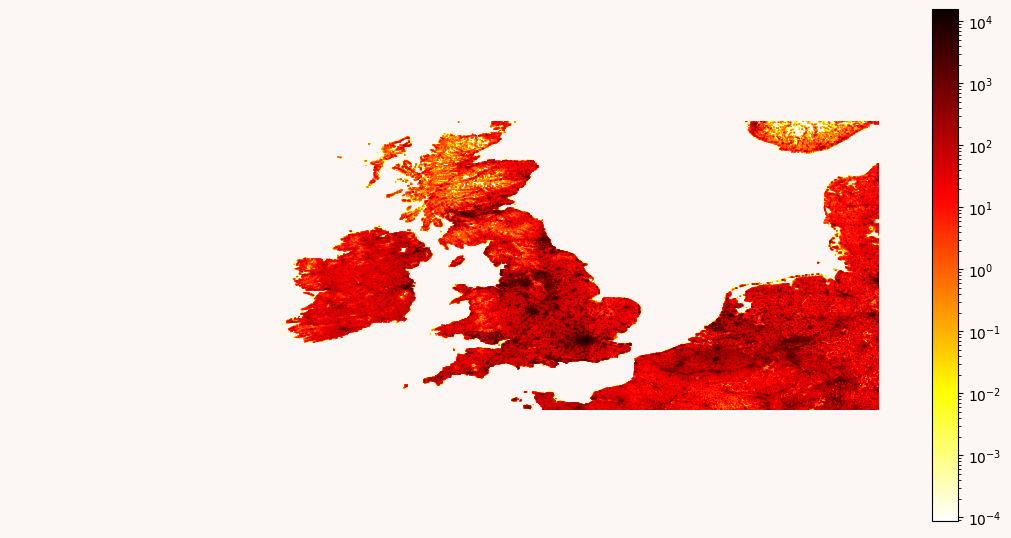

In [49]:


fig, axes = plt.subplots(1,3,facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
plt.subplots_adjust(wspace=0.0)
axes[0].imshow(ghs_data17[0], norm=colors.LogNorm(), cmap=newcmp)
axes[1].imshow(ghs_data18[0], norm=colors.LogNorm(), cmap=newcmp)
axes[2].imshow(ghs_data19[0], norm=colors.LogNorm(), cmap=newcmp)

# adding a colorbar
cbar = fig.colorbar(axes[2].imshow(ghs_data19[0], norm=colors.LogNorm(), cmap=newcmp), ax=axes.ravel().tolist(), shrink=0.95)


for ax in axes:
    ax.axis('off')

plt.show()

In [8]:
our_cmap = cm.get_cmap('hot_r', 10)
newcolors = our_cmap(np.linspace(0, 1, 10))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = np.vstack((background_colour, newcolors))
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 1, 5, 10, 20, 50, 100, 200, 1000, 2000, 10000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

C:\Users\kirst\AppData\Local\Temp\ipykernel_9268\573668819.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  our_cmap = cm.get_cmap('hot_r', 10)


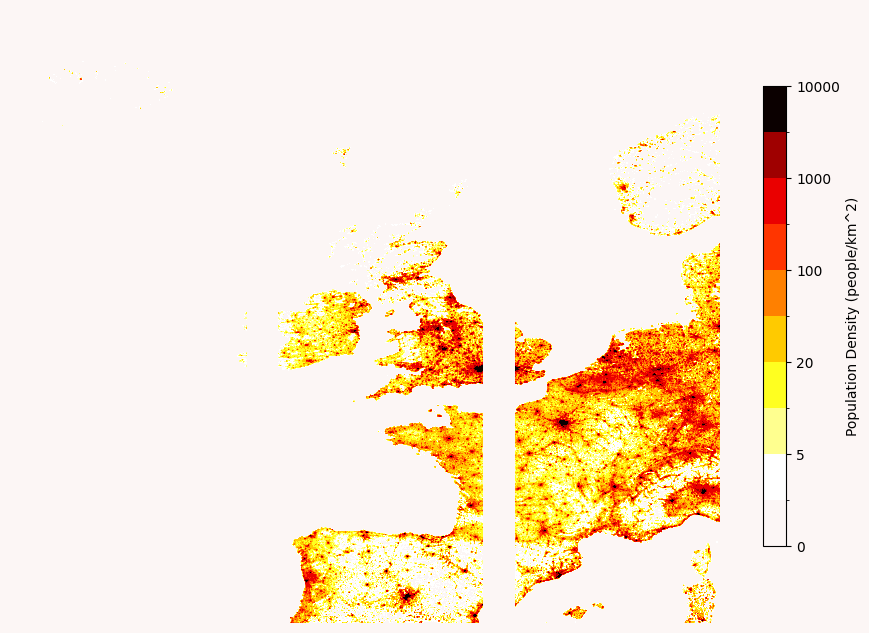

In [65]:
fig, axes = plt.subplots(3,3,facecolor='#FCF6F5FF')
plt.tight_layout()
fig.set_size_inches(10, 7)

plt.subplots_adjust(wspace=0, hspace=0.0)

axes[0][0].imshow(ghs_data1[0], norm=norm, cmap=our_cmap)
axes[0][1].imshow(ghs_data2[0], norm=norm, cmap=our_cmap)
axes[0][2].imshow(ghs_data3[0], norm=norm, cmap=our_cmap)

axes[1][0].imshow(ghs_data4[0], norm=norm, cmap=our_cmap)
axes[1][1].imshow(ghs_data5[0], norm=norm, cmap=our_cmap)
axes[1][2].imshow(ghs_data6[0], norm=norm, cmap=our_cmap)

axes[2][1].imshow(ghs_data8[0], norm=norm, cmap=our_cmap)
axes[2][2].imshow(ghs_data9[0], norm=norm, cmap=our_cmap)

'''
for row in axes:
    for ax in row:
        ax.axis('off')
'''

for row in axes:
    for ax in row:
        ax.label_outer()
        ax.axis('off')

# adding a colorbar
cbar = fig.colorbar(axes[1][2].imshow(ghs_data6[0], norm=norm, cmap=our_cmap), ax=axes.ravel().tolist(), shrink=0.75)

# add colourbar label
cbar.set_label('Population Density (people/km^2)')


plt.show()

In [91]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio

# Function to get bounds from a GeoTIFF file
def get_bounds(tif_path):
    with rasterio.open(tif_path) as tif:
        bounds = tif.bounds
    return [bounds.left, bounds.right, bounds.bottom, bounds.top]

# Assuming 'ghs_file17', 'ghs_file18', 'ghs_file19' are paths to your GeoTIFF files
bounds17 = get_bounds(ghs_data17)
bounds18 = get_bounds(ghs_data18)
bounds19 = get_bounds(ghs_data19)

fig, axes = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, facecolor='#FCF6F5FF', figsize=(14, 7))
plt.subplots_adjust(wspace=0.0)

# Plot each dataset with its corresponding bounds
axes[0].imshow(ghs_data17[0], norm=norm, cmap=our_cmap, transform=ccrs.PlateCarree(), extent=bounds17)
axes[1].imshow(ghs_data18[0], norm=norm, cmap=our_cmap, transform=ccrs.PlateCarree(), extent=bounds18)
axes[2].imshow(ghs_data19[0], norm=norm, cmap=our_cmap, transform=ccrs.PlateCarree(), extent=bounds19)

for ax in axes:
    ax.add_feature(cfeature.BORDERS, edgecolor='white')  # Add borders in white
    ax.set_extent(ax.images[0].get_extent(), crs=ccrs.PlateCarree())  # Adjust the view to the data extent
    ax.axis('off')

# Adjust colorbar addition as necessary
cbar = fig.colorbar(axes[2].images[0], ax=axes.ravel().tolist(), shrink=0.5, orientation='horizontal')
cbar.set_label('Population Density (people/km^2)')

plt.show()

TypeError: invalid path or file: array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [14]:
import geopandas as gpd
import pandas as pd

df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
western_europe = df.loc[df['ADMIN'].isin(['United Kingdom', 'Germany', 'Austria', 'Czechia',
                                              'Italy', 'Denmark', 'Luxembourg',
                                              'Belgium', 'Switzerland', 'Ireland'])]
france = df.loc[df['ADMIN'] == 'France']
Polygons = list(france.iloc[0].geometry)
france.geometry = [Polygons[1]]

spain = df.loc[df['ADMIN'] == 'Spain']
Polygons = list(spain.iloc[0].geometry)
spain.geometry = [Polygons[2]]

netherlands = df.loc[df['ADMIN'] == 'Netherlands']
Polygons = list(netherlands.iloc[0].geometry)
netherlands.geometry = [Polygons[0]]


portugal = df.loc[df['ADMIN'] == 'Portugal']
Polygons = list(portugal.iloc[0].geometry)
portugal.geometry = [Polygons[0]]

western_europe = pd.concat([western_europe, france, spain, netherlands, portugal])

DataSourceError: ../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp: No such file or directory